# Problem Statement:

A Supermarket company wants to increase their revenue by targeting potential customers who are likely to respond to their advertising campaigns. They have a large dataset containing customer purchase history. The company wants a marketing strategy to identify customers who are most likely to respond to their campaigns. The goal of the project is to identify the customers behavior and formulate a strategy to maximize the profits of the supermarket. This will allow the company to target their marketing efforts more effectively and maximize their return on investment.

In [2]:
# dataset: C:\Users\Harsh\Desktop\data science projects\predictive marketing

# Data Collection


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [4]:
df=pd.read_csv('ECommerce_consumer behaviour.csv')
df.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   2425083    49125             1          2                 18   
2   2425083    49125             1          2                 18   
3   2425083    49125             1          2                 18   
4   2425083    49125             1          2                 18   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN          17                  1          0   
1                     NaN          91                  2          0   
2                     NaN          36                  3          0   
3                     NaN          83                  4          0   
4                     NaN          83                  5          0   

   department_id  department        product_name  
0             13      pantry  baking ingredients  
1             16  dairy eggs     soy lactosefree  
2             16  dairy eggs              butter  
3              4     produce    fresh vegetables  
4              4     produce    fresh vegetables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [6]:
df.describe()

order_id       user_id  order_number     order_dow  \
count  2.019501e+06  2.019501e+06  2.019501e+06  2.019501e+06   
mean   1.707013e+06  1.030673e+05  1.715138e+01  2.735367e+00   
std    9.859832e+05  5.949117e+04  1.752576e+01  2.093882e+00   
min    1.000000e+01  2.000000e+00  1.000000e+00  0.000000e+00   
25%    8.526490e+05  5.158400e+04  5.000000e+00  1.000000e+00   
50%    1.705004e+06  1.026900e+05  1.100000e+01  3.000000e+00   
75%    2.559031e+06  1.546000e+05  2.400000e+01  5.000000e+00   
max    3.421080e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       2.019501e+06            1.895159e+06  2.019501e+06   
mean        1.343948e+01            1.138603e+01  7.120590e+01   
std         4.241008e+00            8.970980e+00  3.820727e+01   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  3.100000e+01   
50%         1.300000e+01            8.000000e+00  8.300000e+01   
75%         1.600000e+01            1.500000e+01  1.070000e+02   
max         2.300000e+01            3.000000e+01  1.340000e+02   

       add_to_cart_order     reordered  department_id  
count       2.019501e+06  2.019501e+06   2.019501e+06  
mean        8.363173e+00  5.897427e-01   9.928349e+00  
std         7.150059e+00  4.918804e-01   6.282933e+00  
min         1.000000e+00  0.000000e+00   1.000000e+00  
25%         3.000000e+00  0.000000e+00   4.000000e+00  
50%         6.000000e+00  1.000000e+00   9.000000e+00  
75%         1.100000e+01  1.000000e+00   1.600000e+01  
max         1.370000e+02  1.000000e+00   2.100000e+01

# Data Cleaning

In [7]:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [10]:
# Taking care of null values
df['days_since_prior_order'].fillna(-1,inplace=True)

In [11]:
df['days_since_prior_order']=df['days_since_prior_order'].astype('int64')
df['days_since_prior_order'].sort_values().unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64)

# Exploratory Data Analysis (EDA)

#  Question : The most amount of sales happen at what period of day ??

In [12]:
peak_hours=df.groupby('order_hour_of_day').size().reset_index()

In [13]:
condition=[
    peak_hours['order_hour_of_day']<6,
   ( (peak_hours['order_hour_of_day']>=6) & (peak_hours['order_hour_of_day']<12)),
    ( (peak_hours['order_hour_of_day']>=12) & (peak_hours['order_hour_of_day']<18)),
    peak_hours['order_hour_of_day']>=18,
]
value=[
    'Night',
    'Morning',
    'Afternoon',
    'Evening',
]
peak_hours['day_period']=np.select(condition,value,default='NA')

([<matplotlib.patches.Wedge at 0x1d89ca90940>,
 [Text(0.09782856425028649, 1.095641169369209, 'Afternoon'),
  Text(-1.0226527550939348, -0.4051929694587318, 'Evening'),
  Text(0.4372432616445688, -1.0093653105523388, 'Morning'),
  Text(1.0981814263534015, -0.06322621934299515, 'Night')],
 [Text(0.053361035045610815, 0.5976224560195685, '47.17%'),
  Text(-0.5578105936876008, -0.22101434697749003, '17.68%'),
  Text(0.23849632453340114, -0.550562896664912, '33.33%'),
  Text(0.599008050738219, -0.0344870287325428, '1.83%')])

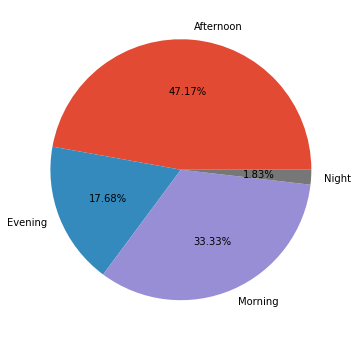

In [14]:
plt.figure(figsize=(6, 6))
peak_dp=peak_hours[[0,'day_period']].groupby('day_period').sum()
plt.pie(x=peak_dp[0].values,labels=peak_dp[0].index,autopct="%1.2f%%")

# Observation:

1. The most amount of sales happens in the Afternoon.
2. The second most amount of sales happens in the Morning.
3. The third most amount of sales happens in the evening.

# Question: Which day accounts for the most amount of sales

[Text(0, 0, 'Sunday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday')]

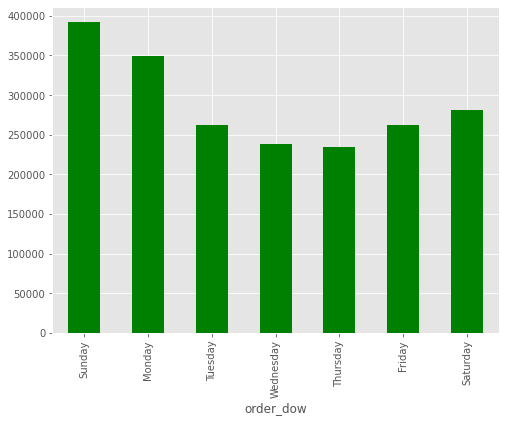

In [15]:
ax=df.groupby('order_dow').size().plot(kind='bar',color='g',figsize=(8,6))
ax.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

# Observation
1. The most amount of sales in a week happens on Sunday.
2. The second most amount of sales in a week happens on Monday.
3. The third most amount of sales in a week happens on Saturday.

# Question: Which products are sold the most ??

C:\Users\Harsh\AppData\Local\Temp\ipykernel_12856\2434192993.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  df.groupby('product_name').size().sort_values(0,ascending=False).head(10).plot(kind='barh',color='b',figsize=(8,6))


<AxesSubplot:ylabel='product_name'>

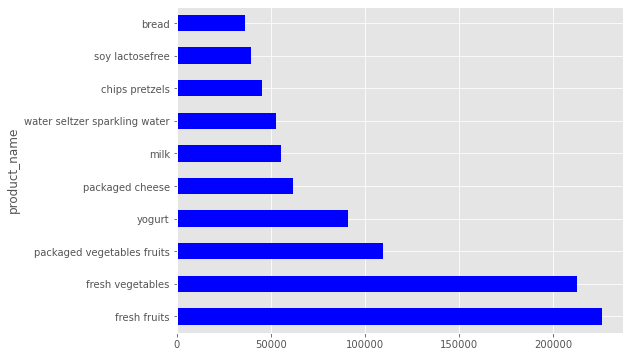

In [16]:
df.groupby('product_name').size().sort_values(0,ascending=False).head(10).plot(kind='barh',color='b',figsize=(8,6))

# Observation

#### From this we can say that the supermarket  earns a major part of their income by selling food items.

1. Fresh Fruits and Fresh vegetables are the most sold item in the supermarket
2. packaged vegetables fruits is the third most sold item in supermarket.
3. Most of the sold products are Organic.
4. Chips Pretzels is the only Junk food in the most sold items list.

# Question: Which products are sold the least ??

C:\Users\Harsh\AppData\Local\Temp\ipykernel_12856\3512232071.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  df.groupby('product_name').size().sort_values(0).head(10).plot(kind='barh',color='r',figsize=(8,6))


<AxesSubplot:ylabel='product_name'>

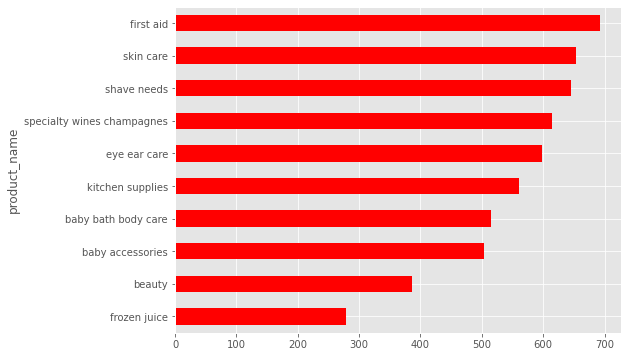

In [17]:
df.groupby('product_name').size().sort_values(0).head(10).plot(kind='barh',color='r',figsize=(8,6))

# Observation

1. Frozen juice and beauty are the least sold item in the supermarket
2. baby accessories is the third most sold item in supermarket.
3. Most of the least sold products are of gromming or beauty based.
4. There are no food items in the least sold products list.

# Question: Goods from which department is sold the most?

C:\Users\Harsh\AppData\Local\Temp\ipykernel_12856\3434307967.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  df.groupby('department').size().sort_values(0,ascending=False).head(10).plot(kind='barh',color='m',figsize=(8,6))


<AxesSubplot:ylabel='department'>

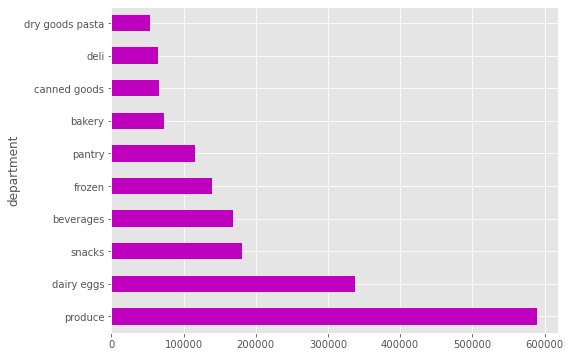

In [18]:
df.groupby('department').size().sort_values(0,ascending=False).head(10).plot(kind='barh',color='m',figsize=(8,6))

# Observation
1. The most goods were sold from the produce deparment.
2. Dairy eggs department has the second most sales.

# Question: Goods from which department is sold the most?

C:\Users\Harsh\AppData\Local\Temp\ipykernel_12856\2676921485.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  df.groupby('department').size().sort_values(0).head(10).plot(kind='barh',color='grey',figsize=(8,6))


<AxesSubplot:ylabel='department'>

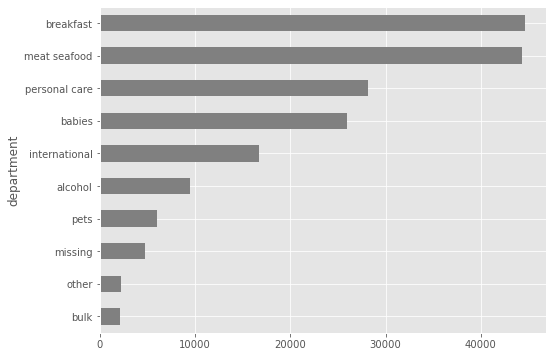

In [19]:
df.groupby('department').size().sort_values(0).head(10).plot(kind='barh',color='grey',figsize=(8,6))

# Observation

1. The least goods were sold from the bulk deparment.
2. pets and alcohol department have very low sales.

# Question: Which products were most essential to the customers

In [20]:
df[df['add_to_cart_order']<=3].groupby('product_name').size().sort_values(0,ascending=False)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_12856\3440234978.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  df[df['add_to_cart_order']<=3].groupby('product_name').size().sort_values(0,ascending=False)


product_name
fresh fruits                  77694
fresh vegetables              48282
packaged vegetables fruits    27572
milk                          26659
yogurt                        26124
                              ...  
skin care                       146
baby accessories                134
baby bath body care             117
beauty                          100
frozen juice                     67
Length: 134, dtype: int64

# Observation

#### 134 different products were added to the card before everything else.

C:\Users\Harsh\AppData\Local\Temp\ipykernel_12856\4031544161.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  df[df['add_to_cart_order']<=3].groupby('product_name').size().sort_values(0,ascending=False).head(5).plot(kind='pie',autopct='%1.3f%%',figsize=(8,6))


<AxesSubplot:ylabel='None'>

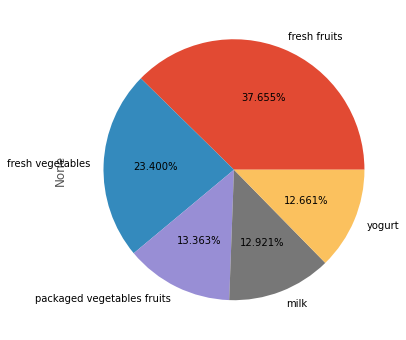

In [21]:
df[df['add_to_cart_order']<=3].groupby('product_name').size().sort_values(0,ascending=False).head(5).plot(kind='pie',autopct='%1.3f%%',figsize=(8,6))

# Observation


These Products were added to the cart before everything else by all the customers, So we can they are essential.

Top 5 products added to cart were food items and milk.

# Question: On Average a user buys how many products ?

In [22]:
df.groupby('user_id').size().mean()

19.183465845943406

# Observation:
 
#### On average a customer buys 19 products.

# Question: Which product was reordered the most amount of times?

In [23]:
reorder=df[df['reordered']==1].groupby(['product_name','department']).size().sort_values(0,ascending=False).head(10).reset_index()
reorder

C:\Users\Harsh\AppData\Local\Temp\ipykernel_12856\1779640930.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  reorder=df[df['reordered']==1].groupby(['product_name','department']).size().sort_values(0,ascending=False).head(10).reset_index()


product_name  department       0
0                   fresh fruits     produce  162355
1               fresh vegetables     produce  126171
2     packaged vegetables fruits     produce   69872
3                         yogurt  dairy eggs   62464
4                           milk  dairy eggs   43162
5  water seltzer sparkling water   beverages   38467
6                packaged cheese  dairy eggs   35864
7                soy lactosefree  dairy eggs   27251
8                 chips pretzels      snacks   26615
9                          bread      bakery   24540

# Observation:

1. Fresh fruits were reordered the most amount of times.
2. fresh vegetables were the second most reordered product.
3. packaged vegetables fruits were the third most reordered product.

This top three is same as most ordered items top three.

<AxesSubplot:xlabel='0', ylabel='product_name'>

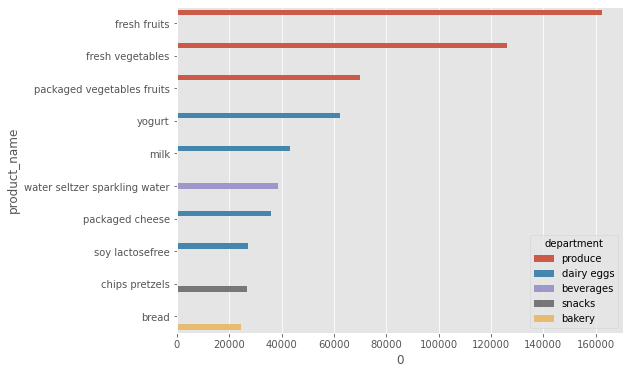

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(y='product_name',x=0,data=reorder,hue='department')

# Observation:

#### we can see that the top ten reordered products belong to 5 departments

1. The top three products were from produce departments.
2. The 4 and 5 most redordered products were from dairy eggs department.
3. The products from position 6 to 10 are from four different departments,i.e. dairy eggs,beverages,snacks and backery.

# Question: a user orders how many times?

<AxesSubplot:ylabel='Frequency'>

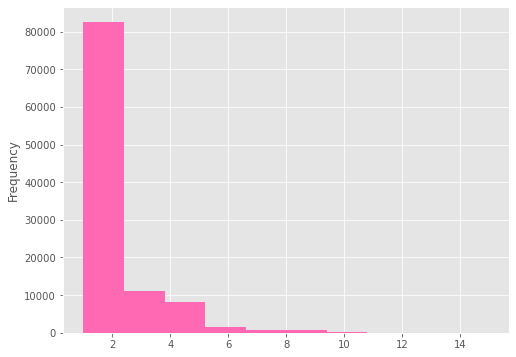

In [25]:
plt.figure(figsize=(8, 6))
# plt.xlim(0,10)
df.groupby(['order_id','user_id']).size().reset_index().groupby('user_id').size().plot(kind='hist',color='hotpink')

# Observation:

1. Most of the user order once or twice.
2. Close to 12,000 people ordered 3 to 4 times.

# Question: After what amount of time the users are more likely to reorder?

<AxesSubplot:xlabel='days_since_prior_order', ylabel='Count'>

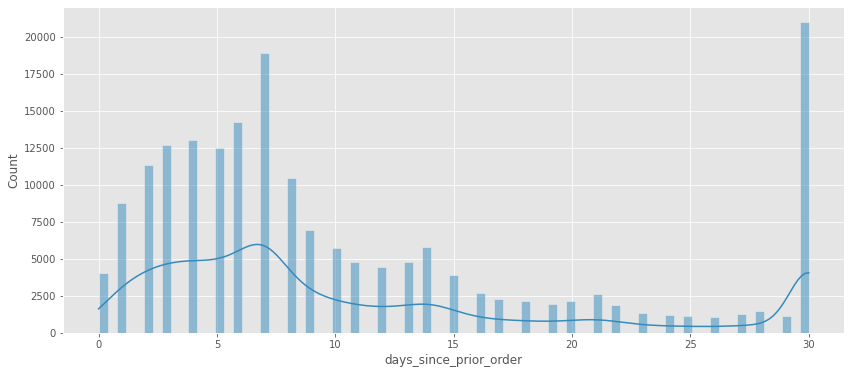

In [26]:
plt.figure(figsize=(14, 6))
order_rate=df[df['days_since_prior_order']!=-1].groupby(['order_id','user_id','days_since_prior_order']).size()
sns.histplot(order_rate,x='days_since_prior_order',kde=True)

# Observation:

1. The users are more likey to reorder in the first 10 days after they have ordered.
2. There is a dip after the 10th day of them ordering and that decline continues till the 29th day.
3. At day 30th after the user have  made their last order we see a big spike, The biggest one in all of the thirty days.

#### There is a big spike at the 30th day because the monthly supplies(food, water,etc..) of the users are over. They need to restock their monthly supplies.

# Feature Engineering

In [27]:
clus=df.query('days_since_prior_order!=-1').groupby(['order_id','user_id','days_since_prior_order']).size().reset_index().drop(0,axis=1)
clus

order_id  user_id  days_since_prior_order
0             10   135442                       8
1             11   143742                      23
2             28    98256                       6
3             38    42756                      24
4             56    41591                       2
...          ...      ...                     ...
187741   3420991   186459                       7
187742   3421019    47149                       3
187743   3421027    51127                       2
187744   3421074   167185                       6
187745   3421080    52726                       2

[187746 rows x 3 columns]

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
 
scalar = StandardScaler()
 
# fitting
scalar.fit(clus)
scaled_data = scalar.transform(clus)
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=2)

#fit PCA model to data
pca_fit = pca.fit(scaled_data)
newdata=pca.transform(scaled_data)

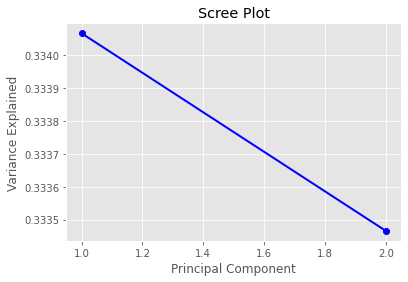

In [29]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [30]:
print(pca_fit.explained_variance_ratio_)

[0.33406545 0.3334658 ]


In [31]:
newdata

array([[ 0.85727954,  0.82127497],
       [ 2.12945926,  0.71426372],
       [ 0.40298051,  1.26931376],
       ...,
       [-1.97857296, -0.57852539],
       [-0.74111311, -1.97585424],
       [-1.96598299, -0.59778768]])

# Modelling

In [32]:
kmeans = KMeans(n_clusters=3)
preds=kmeans.fit_predict(newdata) 
score = silhouette_score(newdata,preds,sample_size=30000,random_state=42)
score

C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3655929466054914

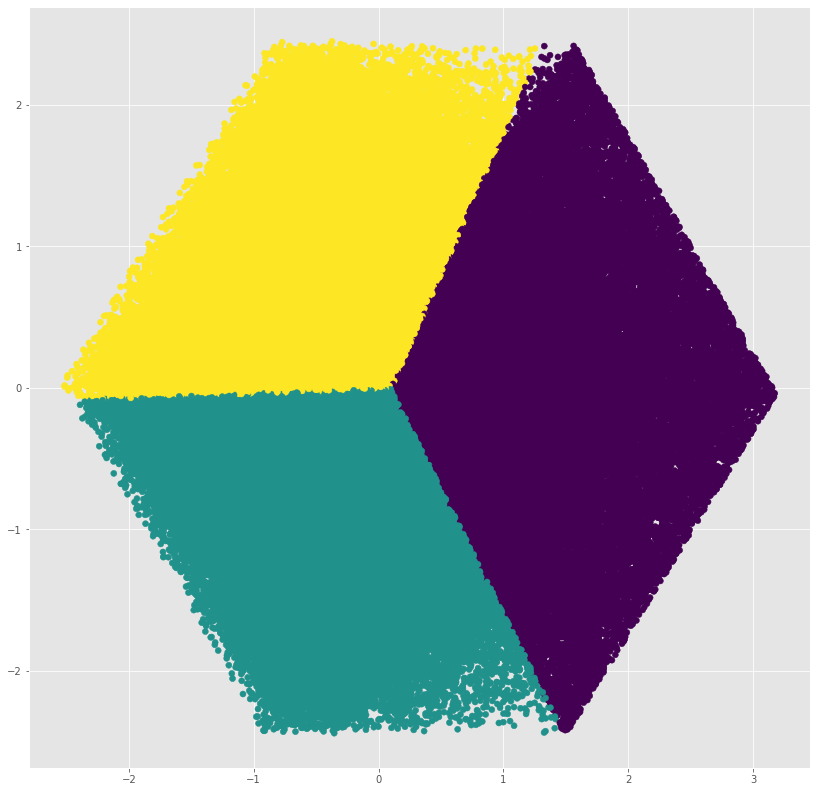

In [33]:
# from sklearn.cluster import DBSCAN
# db=DBSCAN().fit(newdata)
# db.labels_
plt.figure(figsize =(14, 14))
plt.scatter(newdata[:,0],newdata[:,1],c=preds,cmap='viridis')

In [34]:
np.unique(preds,return_counts=True)

(array([0, 1, 2]), array([56262, 64328, 67156], dtype=int64))

### The data is not seperated into many groups instead it is concentrated in the center, So we cannot put them into clusters.

In [35]:
new_df=df.groupby(['order_id','user_id']).size().groupby('user_id').size().reset_index()
new_df['type_of_consumer']=np.where(new_df[0]<3,'Need-Based Consumers','Impulsive Consumers')
new_df

user_id  0      type_of_consumer
0             2  2  Need-Based Consumers
1             3  3   Impulsive Consumers
2             7  1  Need-Based Consumers
3            10  1  Need-Based Consumers
4            11  1  Need-Based Consumers
...         ... ..                   ...
105268   206204  1  Need-Based Consumers
105269   206205  1  Need-Based Consumers
105270   206206  4   Impulsive Consumers
105271   206208  2  Need-Based Consumers
105272   206209  3   Impulsive Consumers

[105273 rows x 3 columns]

<AxesSubplot:xlabel='type_of_consumer', ylabel='count'>

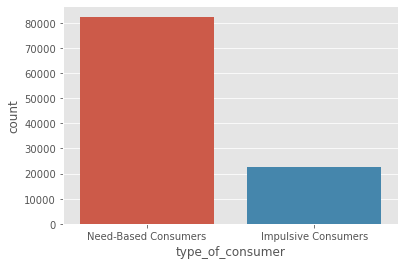

In [36]:
sns.countplot(x=new_df['type_of_consumer'])

# Conclusion:

### The Marketing Strategy  I could come up with the given data

<b><i>Sales is about solving customers problems<i><b>

>We can categorize the consumers into Impulsive and Need-Based and based on that we can give them notification based on their buying behaviour.

>If it is a Impulsive buyer then we can give them notifications on a weekly basis and for Need-Based buyers we can give them notification on Half-Monthly or Monthly basis as not to annoy them with notification but to keep them interested and informed of all the offers.

>We can futhur categorize the products into Essential and NoN-Essential and then we can give notification to Need-Based consumers when there are offers on Essential products as it majorly stock up on Essential items.

>If we want to make the notifications more personalized then we can get the top 5 most bought items by the user and we can show them notification if there are offers on their most needed products.